## 로지스틱 회귀 예제 (통신사 이탈고객 분류)

In [19]:
!ls # Colab에서 사용시 Colab 폴더(왼쪽 메뉴바에 폴더 모양)에 Churn_Dataset.csv 파일 미리 업로드 필요

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [20]:
# Data Source: https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset

import pandas as pd
import matplotlib.pyplot as plt

- 데이터 불러오기

In [21]:
df = pd.read_csv('../data/Churn_Dataset.csv')
df.head()

,Anonymous Customer ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Churn,Customer Value
0,1.0,8.0,0.0,38.0,0.0,4370.0,71.0,5.0,17.0,3.0,1.0,1.0,0.0,132.60
1,2.0,0.0,0.0,39.0,0.0,318.0,5.0,7.0,4.0,2.0,1.0,2.0,0.0,17.46
2,3.0,10.0,0.0,37.0,0.0,2453.0,60.0,359.0,24.0,3.0,1.0,1.0,0.0,181.29
3,4.0,10.0,0.0,38.0,0.0,4198.0,66.0,1.0,35.0,1.0,1.0,1.0,0.0,252.48
4,5.0,3.0,0.0,38.0,0.0,2393.0,58.0,2.0,33.0,1.0,1.0,1.0,0.0,144.78


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Anonymous Customer ID    3150 non-null   float64
 1   Call  Failure            3150 non-null   float64
 2   Complains                3150 non-null   float64
 3   Subscription  Length     3150 non-null   float64
 4   Charge  Amount           3150 non-null   float64
 5   Seconds of Use           3150 non-null   float64
 6   Frequency of use         3150 non-null   float64
 7   Frequency of SMS         3150 non-null   float64
 8   Distinct Called Numbers  3150 non-null   float64
 9   Age Group                3150 non-null   float64
 10  Tariff Plan              3150 non-null   float64
 11  Status                   3150 non-null   float64
 12  Churn                    3150 non-null   float64
 13  Customer Value           3150 non-null   float64
dtypes: float64(14)
memory us

In [23]:
df.describe()

,Anonymous Customer ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Churn,Customer Value
count,3150.000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1575.500,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,0.157143,170.950251
std,909.471,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,0.363993,172.626850
min,1.000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,788.250,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,0.000000,47.032500
50%,1575.500,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,0.000000,120.675000
75%,2362.750,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,0.000000,241.732500
max,3150.000,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,1.000000,817.650000


In [24]:
df.corr()

,Anonymous Customer ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Churn,Customer Value
Anonymous Customer ID,1.000000,0.251196,-0.025715,0.074481,0.154998,0.024109,0.035934,0.016782,0.036607,0.106577,0.020902,0.013277,-0.014456,-0.013415
Call Failure,0.251196,1.000000,0.152879,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.050406,0.192285,-0.114645,-0.008987,0.368797
Complains,-0.025715,0.152879,1.000000,-0.020286,-0.033948,-0.104952,-0.090774,-0.111633,-0.058199,0.019976,0.001140,0.271405,0.532053,-0.111824
Subscription Length,0.074481,0.169737,-0.020286,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,0.021453,-0.159680,0.142841,-0.032588,0.117796
Charge Amount,0.154998,0.589028,-0.033948,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.279679,0.324232,-0.356269,-0.202305,0.224622
Seconds of Use,0.024109,0.501607,-0.104952,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020060,0.133593,-0.460618,-0.298935,0.837225
Frequency of use,0.035934,0.573349,-0.090774,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.032544,0.206452,-0.454752,-0.303337,0.816061
Frequency of SMS,0.016782,-0.022282,-0.111633,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.053719,0.195686,-0.296164,-0.220754,0.337932
Distinct Called Numbers,0.036607,0.504058,-0.058199,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.020941,0.172079,-0.413039,-0.278867,0.582982
Age Group,0.106577,0.050406,0.019976,0.021453,0.279679,0.020060,-0.032544,-0.053719,0.020941,1.000000,-0.150593,0.002506,-0.014550,-0.368459


<Axes: >

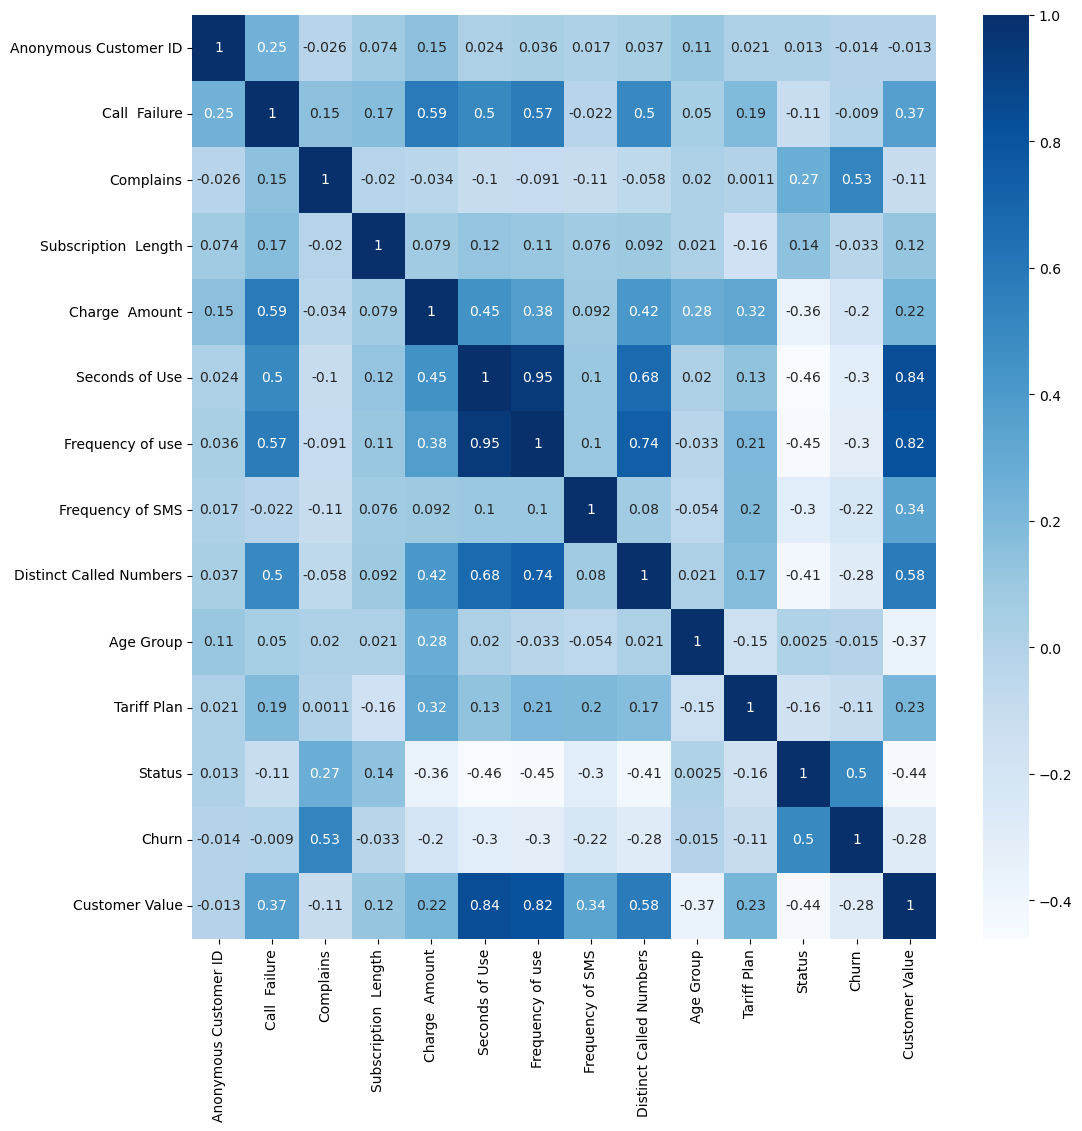

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn과 양의 상관관계: Complains, Status
# Churn과 음의 상관관계: Seconds of Use, Frequency of Use
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

- 데이터 준비

> 결측치 제거

In [26]:
df.isna().sum()

Anonymous Customer ID      7
Call  Failure              7
Complains                  7
Subscription  Length       7
Charge  Amount             7
Seconds of Use             7
Frequency of use           7
Frequency of SMS           7
Distinct Called Numbers    7
Age Group                  7
Tariff Plan                7
Status                     7
Churn                      7
Customer Value             7
dtype: int64

In [27]:
df.dropna(inplace=True)
df.isna().sum()

Anonymous Customer ID      0
Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Churn                      0
Customer Value             0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Anonymous Customer ID    3150 non-null   float64
 1   Call  Failure            3150 non-null   float64
 2   Complains                3150 non-null   float64
 3   Subscription  Length     3150 non-null   float64
 4   Charge  Amount           3150 non-null   float64
 5   Seconds of Use           3150 non-null   float64
 6   Frequency of use         3150 non-null   float64
 7   Frequency of SMS         3150 non-null   float64
 8   Distinct Called Numbers  3150 non-null   float64
 9   Age Group                3150 non-null   float64
 10  Tariff Plan              3150 non-null   float64
 11  Status                   3150 non-null   float64
 12  Churn                    3150 non-null   float64
 13  Customer Value           3150 non-null   float64
dtypes: float64(14)
memory us

> Input 변수, Target 변수 구분

In [29]:
X = df[df.columns.difference(['Anonymous Customer ID', 'Churn'])]
y = df['Churn']
X.shape, y.shape

((3150, 12), (3150,))

> Train set, Test set 분리

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2520, 12), (630, 12), (2520,), (630,))

In [31]:
y_train.mean(), y_test.mean()

(0.15317460317460319, 0.173015873015873)

- Modeling

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train) # 최적화

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = log_reg.predict(X_test)
y_pred.shape

(630,)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.8412698412698413

In [35]:
confusion_matrix(y_test, y_pred)

array([[508,  13],
       [ 87,  22]], dtype=int64)

> Modeling2: ['Complains', 'Frequency of use', 'Seconds of Use', 'Status'] 변수만 사용

In [36]:
log_reg2 = LogisticRegression()
main_features = ['Complains', 'Frequency of use', 'Seconds of Use', 'Status']
log_reg2.fit(X_train[main_features], y_train)
y_pred = log_reg2.predict(X_test[main_features])

accuracy_score(y_test, y_pred)

0.8825396825396825

In [37]:
confusion_matrix(y_test, y_pred)

array([[517,   4],
       [ 70,  39]], dtype=int64)

> Modeling3: 위 Main features만 제외한 변수만 사용

In [38]:
other_features = X_train.columns.difference(main_features) # Model2에서 사용한 컬럼들만 제외
other_features

Index(['Age Group', 'Call  Failure', 'Charge  Amount', 'Customer Value',
       'Distinct Called Numbers', 'Frequency of SMS', 'Subscription  Length',
       'Tariff Plan'],
      dtype='object')

In [39]:
len(other_features)

8

In [40]:
log_reg3 = LogisticRegression()
log_reg3.fit(X_train[other_features], y_train)
y_pred = log_reg3.predict(X_test[other_features])

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
accuracy_score(y_test, y_pred) # 주요 특성을 제외했을 때, 성능이 가장 좋지 않음

0.834920634920635

In [42]:
confusion_matrix(y_test, y_pred)

array([[510,  11],
       [ 93,  16]], dtype=int64)

----

In [43]:
# 95..?%

In [44]:
feature_4 = ['Complains', 'Frequency of use', 'Seconds of Use', 'Status']

- KNN 모델 (k=3 또는 5)

In [49]:
# KNN_3, feature_4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train[feature_4].values, y_train)
y_pred = knn_3.predict(X_train[feature_4])
confusion_matrix(y_train, y_pred), accuracy_score(y_train, y_pred)

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


(array([[2041,   93],
        [ 148,  238]], dtype=int64),
 0.9043650793650794)

In [52]:
y_pred = knn_3.predict(X_test[feature_4])
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


(array([[483,  38],
        [ 54,  55]], dtype=int64),
 0.8539682539682539)

In [53]:
# KNN_5, feature_4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
knn_3 = KNeighborsClassifier(n_neighbors=5)
knn_3.fit(X_train[feature_4].values, y_train)
y_pred = knn_3.predict(X_train[feature_4])
confusion_matrix(y_train, y_pred), accuracy_score(y_train, y_pred)

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


(array([[2044,   90],
        [ 195,  191]], dtype=int64),
 0.8869047619047619)

In [54]:
y_pred = knn_3.predict(X_test[feature_4])
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


(array([[491,  30],
        [ 62,  47]], dtype=int64),
 0.8539682539682539)

- Decision Tree (규제 적용한 결과, 안 한 결과)

In [58]:
# feature_4, 규제X
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train[feature_4], y_train)
y_pred = dt.predict(X_test[feature_4])
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[481,  40],
        [ 17,  92]], dtype=int64),
 0.9095238095238095)

In [59]:
dt.get_depth()

21

In [57]:
# max_depth=6, feature_4
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt.fit(X_train[feature_4], y_train)
y_pred = dt.predict(X_test[feature_4])
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[493,  28],
        [ 29,  80]], dtype=int64),
 0.9095238095238095)

In [60]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=6)
dt.fit(X_train[feature_4], y_train)
y_pred = dt.predict(X_test[feature_4])
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[489,  32],
        [ 23,  86]], dtype=int64),
 0.9126984126984127)

- Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(max_depth=6, max_samples=0.5, criterion='entropy', max_features=3)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       521
         1.0       0.87      0.74      0.80       109

    accuracy                           0.94       630
   macro avg       0.91      0.86      0.88       630
weighted avg       0.93      0.94      0.93       630



- Adaboost

In [63]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier() # Default: Decision Tree(max_depth=1)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       521
         1.0       0.72      0.67      0.69       109

    accuracy                           0.90       630
   macro avg       0.82      0.81      0.81       630
weighted avg       0.89      0.90      0.90       630



- Gradient Boost

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
g_boost = GradientBoostingClassifier()
g_boost.fit(X_train, y_train) # 학습
y_pred = g_boost.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       521
         1.0       0.81      0.76      0.79       109

    accuracy                           0.93       630
   macro avg       0.88      0.86      0.87       630
weighted avg       0.93      0.93      0.93       630



- Support Vector Machine (linear 또는 rbf 커널 사용)

In [ ]:
# kernel=linear model
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

y_pred = svc_linear.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# kernel=rbf
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

y_pred = svc_rbf.predict(X_test)
print(classification_report(y_test, y_pred))